# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [1]:
import pandas as pd
churn_raw = pd.read_csv('./churn_data.csv')

In [2]:
from churn_cleaner import InitAttributeCleaner as IAC
cleaner = IAC()

In [3]:
churn = cleaner.fit_transform(churn_raw)
X = churn.drop(['Churn_Yes'], axis=1)
y = churn['Churn_Yes']

<class 'pandas.core.frame.DataFrame'>


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   average_charge_normal           7043 non-null   float64
 1   tenure_bins                     7043 non-null   int8   
 2   Contract_One year               7043 non-null   uint8  
 3   Contract_Two year               7043 non-null   uint8  
 4   PaymentMethod_Electronic check  7043 non-null   uint8  
 5   MonthlyCharges_normal           7043 non-null   float64
 6   TotalCharges_log                7043 non-null   float64
dtypes: float64(3), int8(1), uint8(3)
memory usage: 192.7 KB


In [5]:
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model, plot_model   

In [6]:
automl = setup(churn, target='Churn_Yes')

,Description,Value
0,session_id,1009
1,Target,Churn_Yes
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7043, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best_model = compare_models(turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
mlp,MLP Classifier,0.7901,0.8345,0.4742,0.6482,0.5453,0.4138,0.4236,0.2340
lr,Logistic Regression,0.7899,0.8345,0.4682,0.6487,0.5432,0.4116,0.4211,0.2520
gbc,Gradient Boosting Classifier,0.7897,0.8337,0.4947,0.6385,0.5568,0.4220,0.4283,0.0870
ada,Ada Boost Classifier,0.7872,0.8297,0.5023,0.6292,0.5580,0.4203,0.4253,0.0390
lightgbm,Light Gradient Boosting Machine,0.7872,0.8264,0.5091,0.6260,0.5605,0.4224,0.4269,0.0210
ridge,Ridge Classifier,0.7870,0.0000,0.4174,0.6614,0.5113,0.3842,0.4010,0.0040
gpc,Gaussian Process Classifier,0.7864,0.8291,0.4765,0.6348,0.5437,0.4082,0.4156,16.2380
lda,Linear Discriminant Analysis,0.7860,0.8288,0.4788,0.6328,0.5446,0.4084,0.4154,0.0050
rbfsvm,SVM - Radial Kernel,0.7846,0.7819,0.4205,0.6502,0.5104,0.3806,0.3955,0.3850
rf,Random Forest Classifier,0.7714,0.7972,0.4735,0.5905,0.5247,0.3769,0.3813,0.1170


In [8]:
best_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1009, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

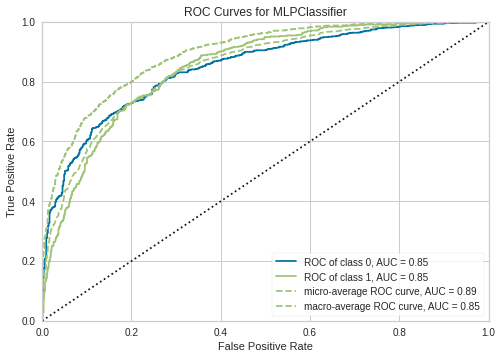

In [9]:
plot_model(best_model)#, plot='confusion_matrix')

In [10]:
save_model(best_model, model_name='best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn_Yes',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=(100,),
                                learning_rate='constant',
           

# Summary

I considered using the F1 score over the accuracy, since my understanding is that
a model with a high F1 score misclassifies a lot of of the difficult cases, but 
correctly classifies more of the more obvious ones. I was thinking this would be
more important for focusing the efforts of marketing/retention efforts. In the end,
I think it depends on how you concentrate these efforts. If you have some kind of
distinct teirs of retention efforts, you'd probably want the F1, to be more sure
of more cases, although you may miss some of the niche situations. On the other hand,
if you use some kind of continuous gradient for retention efforts such as a discount
applied depending on churn risk, with cutoffs for low rates to not give any, you'd
just want the more accurate in general with churn % as your model.'

The automl features from pycaret were interesting to use. It definitely feels like it
streamlines the work, which let's you focus on building the pipeline itself. It did
feel a little obtuse using the module, it's strange to use. It's like it operates
like a class and is saving data in variables somewhere, but you don't instantiate it
so it isn't actually a class. Definitely makes it a little unintuitive for me. I still enjoyed using it though! Definitely makes me want to look into more of it's features, as well as other automated data science options. I really liked the saving and loading of a model into a script - all of my experience in data science so far has been in jupyter which I don't really know if you can "deploy" in the same kind of way as a .py
script. I also like it because I am an avid user of "iPython" in CLI, so it's really awesome to be able to just import a single function from a script I created myself that applies my entire pipeline, from data cleaning, using a model already trained, and spitting out predictions and returning a dataframe of them for further use or analysis.

I did find it interesting that I never quit passed 0.79xx accuracy, since when I used the randomforest I tuned exhaustively I got around .801. It might be due to the way I was splitting the folds or train/test set, or potentially because I just tuned it so much more exhaustively (I did do some 5000 iterations, ha...). I will need to look into the tunable parameters for pycaret to see if that is something I can adjust, or otherwise I may just need to use it as a "ballpark best model" and tune exhaustively the best 3 models or so.

In [11]:
'''
eturn the probability of churn for each new prediction, and 
the percentile where that prediction is in the distribution of probability predictions 
from the training dataset (e.g. a high probability of churn like 0.78 might be at the
90th percentile)
'''

'\neturn the probability of churn for each new prediction, and \nthe percentile where that prediction is in the distribution of probability predictions \nfrom the training dataset (e.g. a high probability of churn like 0.78 might be at the\n90th percentile)\n'

In [12]:
new_churn_raw = pd.read_csv('./new_churn_data_unmodified.csv')

In [13]:
new_churn = cleaner.fit_transform(new_churn_raw)

<class 'pandas.core.frame.DataFrame'>


In [14]:
new_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   average_charge_normal           5 non-null      float64
 1   tenure_bins                     5 non-null      int8   
 2   Contract_One year               5 non-null      uint8  
 3   Contract_Two year               5 non-null      uint8  
 4   PaymentMethod_Electronic check  5 non-null      uint8  
 5   MonthlyCharges_normal           5 non-null      float64
 6   TotalCharges_log                5 non-null      float64
dtypes: float64(3), int8(1), uint8(3)
memory usage: 268.0 bytes


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   average_charge_normal           7043 non-null   float64
 1   tenure_bins                     7043 non-null   int8   
 2   Contract_One year               7043 non-null   uint8  
 3   Contract_Two year               7043 non-null   uint8  
 4   PaymentMethod_Electronic check  7043 non-null   uint8  
 5   MonthlyCharges_normal           7043 non-null   float64
 6   TotalCharges_log                7043 non-null   float64
dtypes: float64(3), int8(1), uint8(3)
memory usage: 192.7 KB


In [16]:
new_churn = predict_model(best_model, new_churn)
new_X = predict_model(best_model, X)
# It is interestingly very confident the times that it is wrong...

In [17]:
new_churn
# Okay so when they're classified at 0, the "Score" is the chance to not churn
# So I need to invert those to find the probability of churn and their percentile

,average_charge_normal,tenure_bins,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MonthlyCharges_normal,TotalCharges_log,Label,Score
0,0.083353,4,0,0,1,0.941457,6.699131,0,0.5627
1,0.608060,0,1,0,0,0.667801,7.439530,0,0.8019
2,0.000000,7,0,0,0,0.000000,5.525054,0,0.9499
3,0.122771,9,0,0,1,1.000000,8.041271,0,0.8448
4,1.000000,2,0,1,0,0.311777,8.143509,0,0.9704


In [18]:
def invert_zeroes(x):
    return 1.0 - x

In [19]:
new_churn['invert_score'] = new_churn['Score'].loc[new_churn['Label'] == 0].apply(invert_zeroes)
new_X['invert_score'] = new_X['Score'].loc[new_X['Label'] == 0].apply(invert_zeroes)
new_X['invert_score'] = new_X['invert_score'].fillna(new_X['Score'])

In [20]:
combined = pd.concat([new_churn, new_X])

In [21]:
combined.head(10)

,average_charge_normal,tenure_bins,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MonthlyCharges_normal,TotalCharges_log,Label,Score,invert_score
0,0.083353,4,0,0,1,0.941457,6.699131,0,0.5627,0.4373
1,0.608060,0,1,0,0,0.667801,7.439530,0,0.8019,0.1981
2,0.000000,7,0,0,0,0.000000,5.525054,0,0.9499,0.0501
3,0.122771,9,0,0,1,1.000000,8.041271,0,0.8448,0.1552
4,1.000000,2,0,1,0,0.311777,8.143509,0,0.9704,0.0296
0,0.245881,0,0,0,1,0.115423,3.396185,0,0.5102,0.4898
1,0.457772,5,1,0,0,0.385075,7.544068,0,0.9358,0.0642
2,0.445428,0,0,0,0,0.354229,4.683519,1,0.5288,0.5288
3,0.336949,6,1,0,0,0.239303,7.517928,0,0.9601,0.0399
4,0.624588,0,0,0,1,0.521891,5.021575,1,0.7220,0.7220


In [22]:
combined['percentile_rank'] = combined['invert_score'].rank(pct=True)

In [23]:
combined.head(10)
# Ah... the first 5 rows are the new churn data. Interesting - the 37% chance to churn
# is actually a very high to chance relatively. No wonder it's hard to predict these.

,average_charge_normal,tenure_bins,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MonthlyCharges_normal,TotalCharges_log,Label,Score,invert_score,percentile_rank
0,0.083353,4,0,0,1,0.941457,6.699131,0,0.5627,0.4373,0.767026
1,0.608060,0,1,0,0,0.667801,7.439530,0,0.8019,0.1981,0.519935
2,0.000000,7,0,0,0,0.000000,5.525054,0,0.9499,0.0501,0.280789
3,0.122771,9,0,0,1,1.000000,8.041271,0,0.8448,0.1552,0.462543
4,1.000000,2,0,1,0,0.311777,8.143509,0,0.9704,0.0296,0.197077
0,0.245881,0,0,0,1,0.115423,3.396185,0,0.5102,0.4898,0.809449
1,0.457772,5,1,0,0,0.385075,7.544068,0,0.9358,0.0642,0.311791
2,0.445428,0,0,0,0,0.354229,4.683519,1,0.5288,0.5288,0.844495
3,0.336949,6,1,0,0,0.239303,7.517928,0,0.9601,0.0399,0.248652
4,0.624588,0,0,0,1,0.521891,5.021575,1,0.7220,0.7220,0.951901
